### IMDB_Review_Classification_RNN

In [1]:
from keras.datasets import imdb
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

In [2]:
print(len(XT))
print(len(Xt))

25000
25000


In [3]:
print(XT[1])
print(len(XT[1]))

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
189


In [4]:
word_idx = imdb.get_word_index()

In [5]:
print(len(word_idx.items()))

88584


In [6]:
idx_word = dict([value,key] for (key,value) in word_idx.items())
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])
print(actual_review)
print(len(actual_review.split()))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [7]:
from keras.preprocessing import sequence

X_train = sequence.pad_sequences(XT,maxlen=500)
X_test = sequence.pad_sequences(Xt,maxlen=500)

In [8]:
print(X_train.shape)
print(X_test.shape)

(25000, 500)
(25000, 500)


In [22]:
from keras.layers import Embedding,SimpleRNN,Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [24]:
from keras.callbacks import ModelCheckpoint # to save the best model
from keras.callbacks import EarlyStopping 

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
earlystop = EarlyStopping(monitor='val_acc',patience=1)

hist = model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128 ,callbacks=[checkpoint,earlystop])

Epoch 1/10
157/157 [==============================] - 50s 319ms/step - loss: 0.5256 - acc: 0.7435 - val_loss: 0.4030 - val_acc: 0.8332
Epoch 2/10
157/157 [==============================] - 51s 323ms/step - loss: 0.3337 - acc: 0.8674 - val_loss: 0.3674 - val_acc: 0.8442
Epoch 3/10
157/157 [==============================] - 58s 371ms/step - loss: 0.3093 - acc: 0.8736 - val_loss: 0.4850 - val_acc: 0.7878


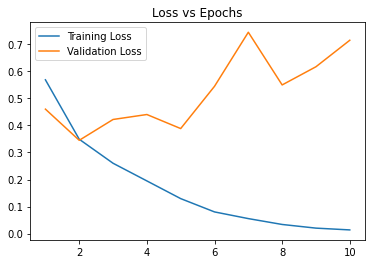

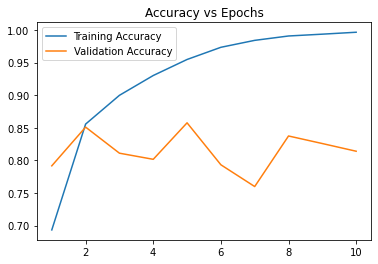

In [12]:
import matplotlib.pyplot as plt
acc = hist.history['acc']
val_acc = hist.history['val_acc']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)

plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Validation Loss")
plt.legend()
plt.show()

plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Accuracy")
plt.plot(epochs,val_acc,label="Validation Accuracy")
plt.legend()
plt.show()

In [14]:
model.save("model.h5")

In [16]:
model.load_weights("model.h5")

In [17]:
model.evaluate(X_test,Yt)

782/782 [==============================] - 30s 38ms/step - loss: 0.7257 - acc: 0.8076


[0.7256922721862793, 0.807640016078949]

In [18]:
model.evaluate(X_train,YT)

782/782 [==============================] - 28s 36ms/step - loss: 0.1454 - acc: 0.9626


[0.14538359642028809, 0.9625999927520752]

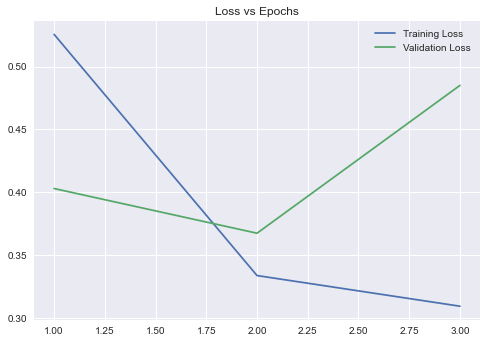

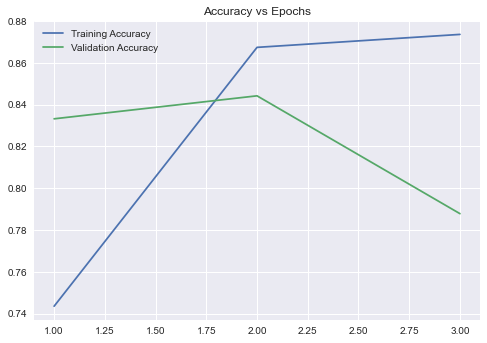

In [28]:
plt.style.use("seaborn")
acc = hist.history['acc']
val_acc = hist.history['val_acc']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)

plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Validation Loss")
plt.legend()
plt.show()

plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Accuracy")
plt.plot(epochs,val_acc,label="Validation Accuracy")
plt.legend()
plt.show()

In [26]:
model.load_weights("best_model.h5")

In [27]:
model.evaluate(X_test,Yt)

782/782 [==============================] - 36s 46ms/step - loss: 0.3708 - acc: 0.8393


[0.37079569697380066, 0.8393200039863586]

In [29]:
model.evaluate(X_train,YT)

782/782 [==============================] - 36s 46ms/step - loss: 0.3029 - acc: 0.8851


[0.3029341399669647, 0.8851199746131897]